# Flujo de Trabajo para el Análisis de Datos

El análisis de datos es un proceso integral que permite extraer insights valiosos a partir de datos crudos. Este proceso puede variar según el contexto y los objetivos específicos, pero generalmente sigue una secuencia lógica de pasos.

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import re

/home/lexie/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


## 1. Cargar los Datos

El primer paso es cargar los datos desde una fuente, que puede ser un archivo CSV, Excel, una base de datos o cualquier otro formato de almacenamiento de datos. Utilizamos librerías como `pandas` en Python para leer estos archivos y cargarlos en un DataFrame, lo cual facilita la manipulación y análisis de los datos.

In [4]:
## Load the Data
# Replace 'path_to_your_data.csv' with the actual path to your dataset
data_path = 'blockbusters.csv' #In this case blockbusters.csv is the dataset file
df = pd.read_csv(data_path)

# If your data is a .xslx file use pd.read_excel(data_path) intead

## 2. Explorar y Limpiar los Datos

Una vez cargados los datos, el siguiente paso es explorarlos para entender su estructura, identificar valores faltantes, duplicados o atípicos, y realizar una limpieza inicial. Esto puede incluir eliminar o imputar valores faltantes, corregir errores y filtrar datos irrelevantes.

In [5]:
## Preliminary Data Exploration
# Display the first few rows of the dataset
print("Dataset Head: \n")
print(df.head())


print('='*100)

# Display the summary statistics of the dataset
print("Dataset Summary: \n")
print(df.describe())

Dataset Head: 

  Main_Genre    Genre_2    Genre_3  imdb_rating  length  rank_in_year rating  \
0     Action  Adventure      Drama          7.4     135             1  PG-13   
1     Action  Adventure     Sci-Fi          8.5     156             2  PG-13   
2  Animation     Action  Adventure          7.8     118             3     PG   
3     Action  Adventure      Drama          6.2     129             4  PG-13   
4     Action     Comedy        NaN          7.8     119             5      R   

                 studio                           title worldwide_gross  year  
0  Walt Disney Pictures                   Black Panther    $700,059,566  2018  
1  Walt Disney Pictures          Avengers: Infinity War    $678,815,482  2018  
2                 Pixar                   Incredibles 2    $608,581,744  2018  
3    Universal Pictures  Jurassic World: Fallen Kingdom    $416,769,345  2018  
4      20th Century Fox                      Deadpool 2    $318,491,426  2018  
Dataset Summary: 

    

La columna worldwide_gross es de tipo string y deseamos que sea de algún tipo numérico

In [6]:
# Dataframe's columns
df.columns

Index(['Main_Genre', 'Genre_2', 'Genre_3', 'imdb_rating', 'length',
       'rank_in_year', 'rating', 'studio', 'title', 'worldwide_gross', 'year'],
      dtype='object')

[700059566.0, 678815482.0, 608581744.0, 416769345.0, 318491426.0, 220159104.0, 216648740.0, 213767512.0, 213030843.0, 199721727.0, 620181382.0, 504014165.0, 412563408.0, 404515480.0, 389813101.0, 334201140.0, 327481748.0, 315058289.0, 264624300.0, 229024295.0, 532177324.0, 486295561.0, 408084349.0, 368384330.0, 364001123.0, 363070709.0, 341268248.0, 330360194.0, 325100054.0, 270395425.0, 936662225.0, 652270625.0, 459005868.0, 356461711.0, 353007020.0, 336045770.0, 281723902.0, 228433663.0, 201151353.0, 200074609.0, 91405499.0, 955113783.0, 774176600.0, 758654942.0, 752100229.0, 748121534.0, 714766572.0, 709582323.0, 708835589.0, 672974414.0, 274220009.0, 215440994.0, 970761885.0, 960366855.0, 864912963.0, 788679850.0, 743559607.0, 716392705.0, 668045518.0, 644783140.0, 518595910.0, 108562013.0, 84440099.0, 17004568.0, 877244782.0, 829685377.0, 757930663.0, 746921274.0, 691247768.0, 624026776.0, 341512219.0, 123795079.0, 45714802.0, 712171856.0, 694713380.0, 665692281.0, 626137675.0, 58

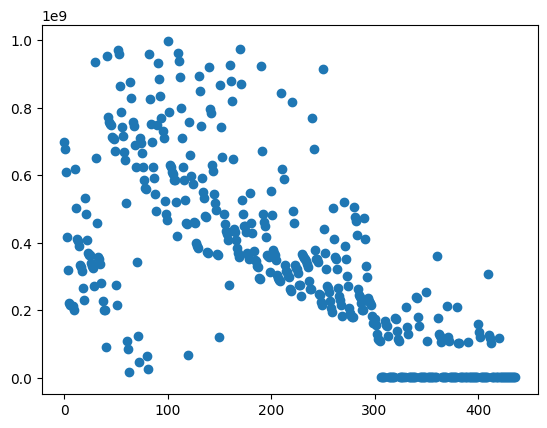

In [7]:
# Repare data for further analisys
worldwide_gross = [re.search(r'\d+(,\d+)*', gross).group().split(',') for gross in df['worldwide_gross'].values]
worldwide_gross = [sum(list(map(lambda x: float(x[1]) * (10**(len(x[1])))**(x[0]),   zip(range(len(gross)-1, -1, -1), gross)))) for gross in worldwide_gross]

# Update dataframe info
df['worldwide_gross'] = worldwide_gross

print(worldwide_gross)
plt.scatter(range(len(worldwide_gross)), worldwide_gross)

## 3. Analizar el DataFrame

Con los datos limpios, procedemos a realizar un análisis exploratorio para comprender las características principales de los datos, como la distribución de las variables, relaciones entre ellas y posibles correlaciones. Esto implica calcular estadísticas descriptivas como la media, desviación estándar y varianza.

In [34]:

## Compute Basic Statistical Estimators

print("Basic Statistical Estimators of a Dataset row usind pandas functions")
# Mean
means_imdb = df['imdb_rating'].mean()
print("Means:\n", means_imdb)

# Standard Deviation
std_devs_imdb = df['imdb_rating'].std()
print("Standard Deviations:\n", std_devs_imdb)

# Variance
variances_imdb = df['imdb_rating'].var()
print("Variances:\n", variances_imdb)

print('='*100)

print("Basic Statistical Estimators of a previosly processed dataset row using numpy functions")
#Mean
means = np.mean(worldwide_gross)
print("Means:\n", means)

# Standard Deviation
std_devs = np.std(worldwide_gross)
print("Standard Deviations:\n", std_devs)

# Variance
variances = np.var(worldwide_gross)
print("Variances:\n", variances)


Basic Statistical Estimators of a Dataset row usind pandas functions
Means:
 7.076659038901602
Standard Deviations:
 0.8202733967437296
Variances:
 0.672848445405496
Basic Statistical Estimators of a previosly processed dataset row using numpy functions
Means:
 336956012.87871855
Standard Deviations:
 270980633.7536066
Variances:
 7.343050386950629e+16


## 4. Visualizar los Datos

La visualización de datos es clave para entender las tendencias, patrones y outliers. Se utilizan gráficos como histogramas, diagramas de dispersión y box plots para visualizar la distribución de los datos, la relación entre variables y la presencia de valores atípicos.

Para las variables numericas se crean histogramas, con estos se puede tener una idea graafica de como distribuye esa variable.

Ademas de los graficos de caja y bigotes que permite identificar outlayers (datos anomalos, erroneos o casos extremos) 

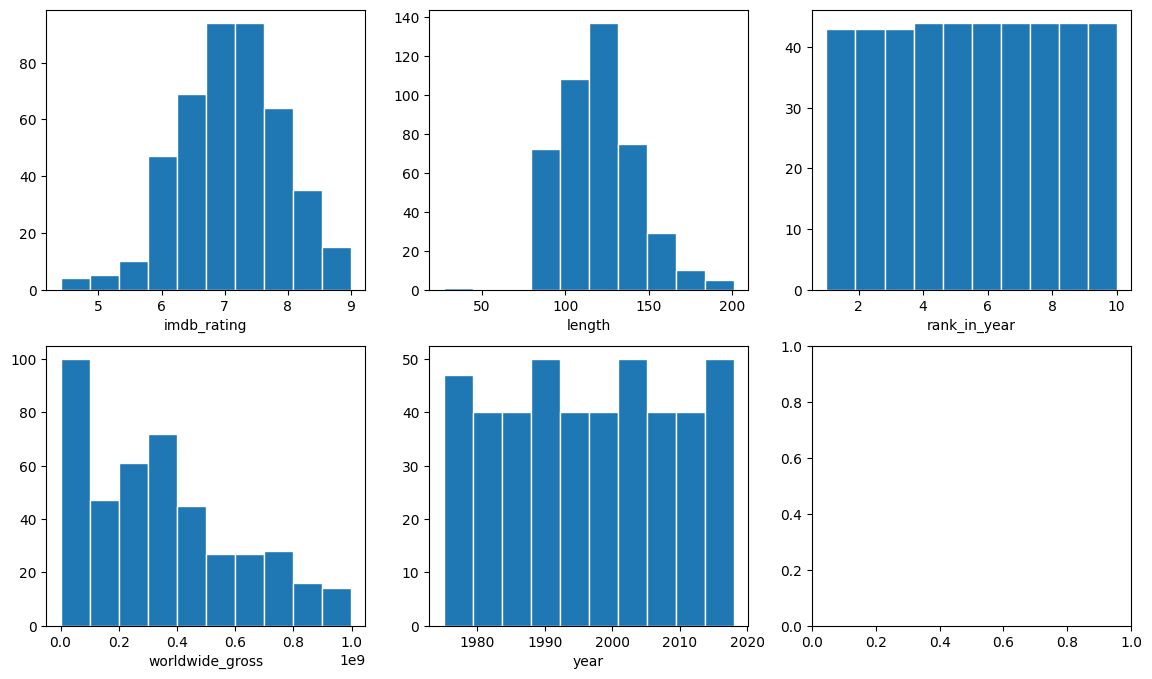

In [10]:
## Data Visualization

# Plot histograms for each numerical attribute
hist_col = ['imdb_rating', 'length', 'rank_in_year', 'worldwide_gross', 'year']
fig, ax = plt.subplots(nrows= 2, ncols= 3, figsize=(14,8))
for i in range(2):
    for j in range(3):
        if i*3 + j >=5 :
            break
        ax[i,j].hist(df[hist_col[i*3 + j]], edgecolor = "white")
        ax[i,j].set_xlabel(hist_col[i*3 + j])



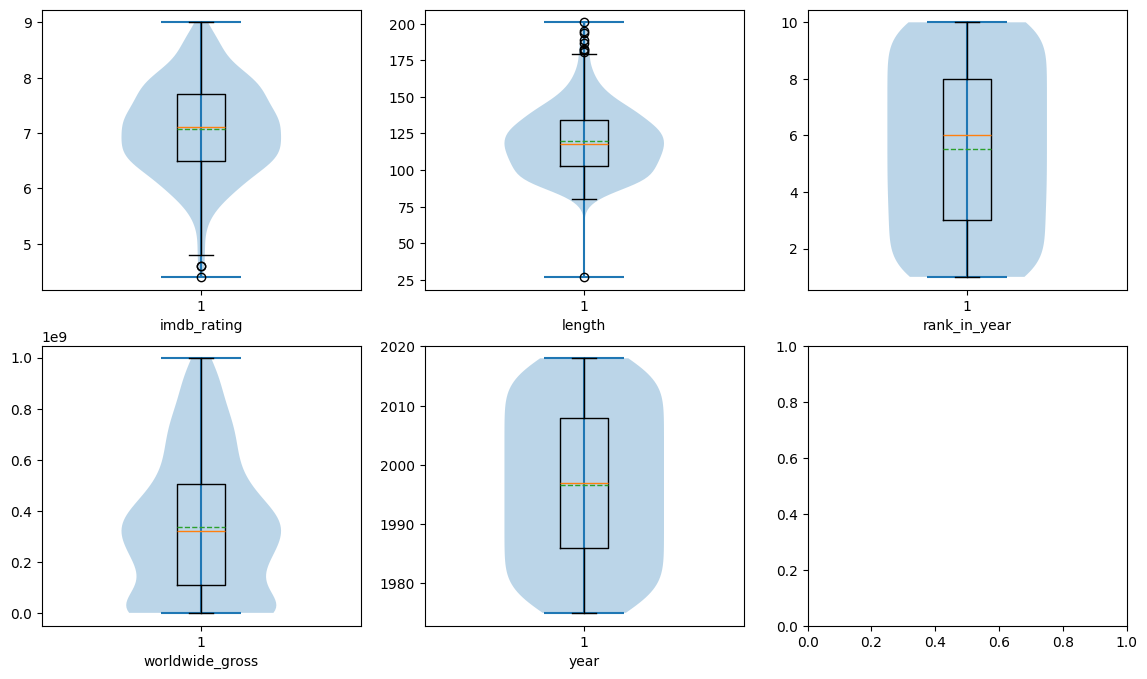

In [11]:
# Box plots to identify outliers
hist_col = ['imdb_rating', 'length', 'rank_in_year', 'worldwide_gross', 'year']
fig, ax = plt.subplots(nrows= 2, ncols= 3, figsize=(14,8))
for i in range(2):
    for j in range(3):
        if i*3 + j >=5 :
            break
        ax[i,j].violinplot(df[hist_col[i*3 + j]])
        ax[i,j].boxplot(df[hist_col[i*3 + j]], showmeans = True, meanline = True)
        ax[i,j].set_xlabel(hist_col[i*3 + j])

Para las variables categoricas se realiza un proceso similar, en este caso se utilizan graficos de barra para analizar cuantos elementos de la muestra pertenecen a cada categria.

Ademas con los graficos de pastel se obtiene una relacion de que porporcion de la muestra pertenece a cada categoria.

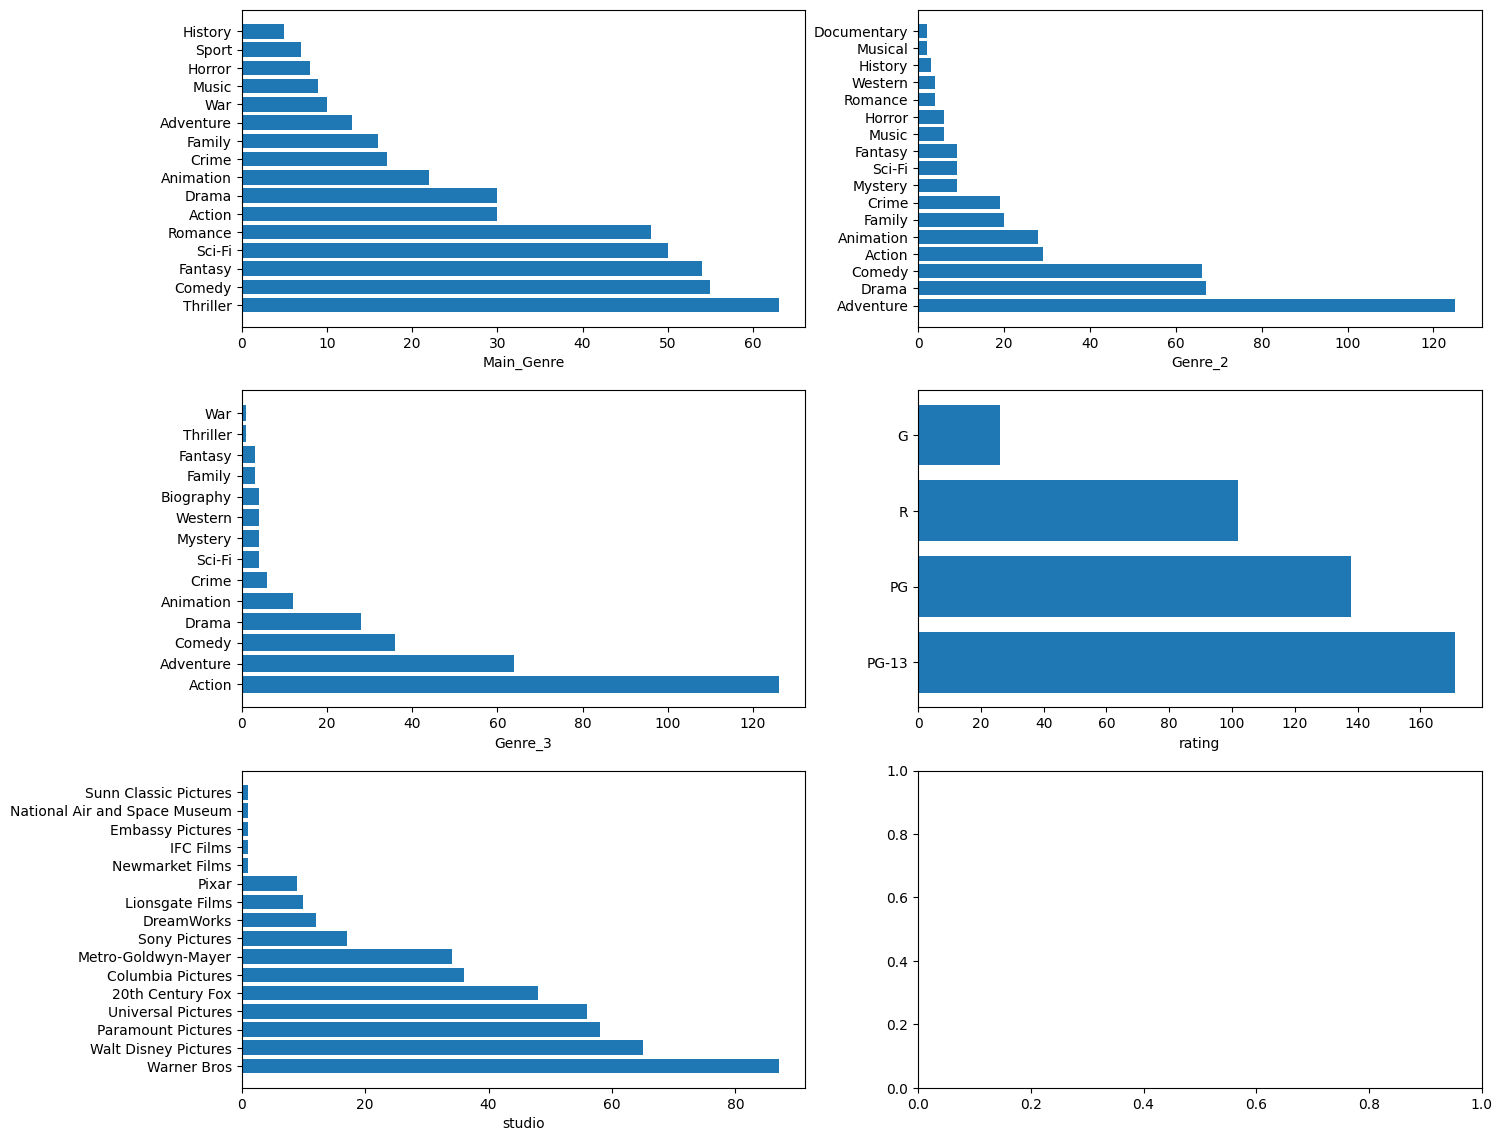

In [12]:
# 
bar_cols = ['Main_Genre', 'Genre_2', 'Genre_3', 'rating', 'studio']
fig, ax = plt.subplots(nrows= 3, ncols= 2, figsize=(16,14))
for i in range(3):
    for j in range(2):
        if i*2 + j >=5 :
            break
        counts = df[bar_cols[i*2 + j]].value_counts()
        ax[i,j].barh(counts.index, counts.values)
        ax[i,j].set_xlabel(bar_cols[i*2 + j])

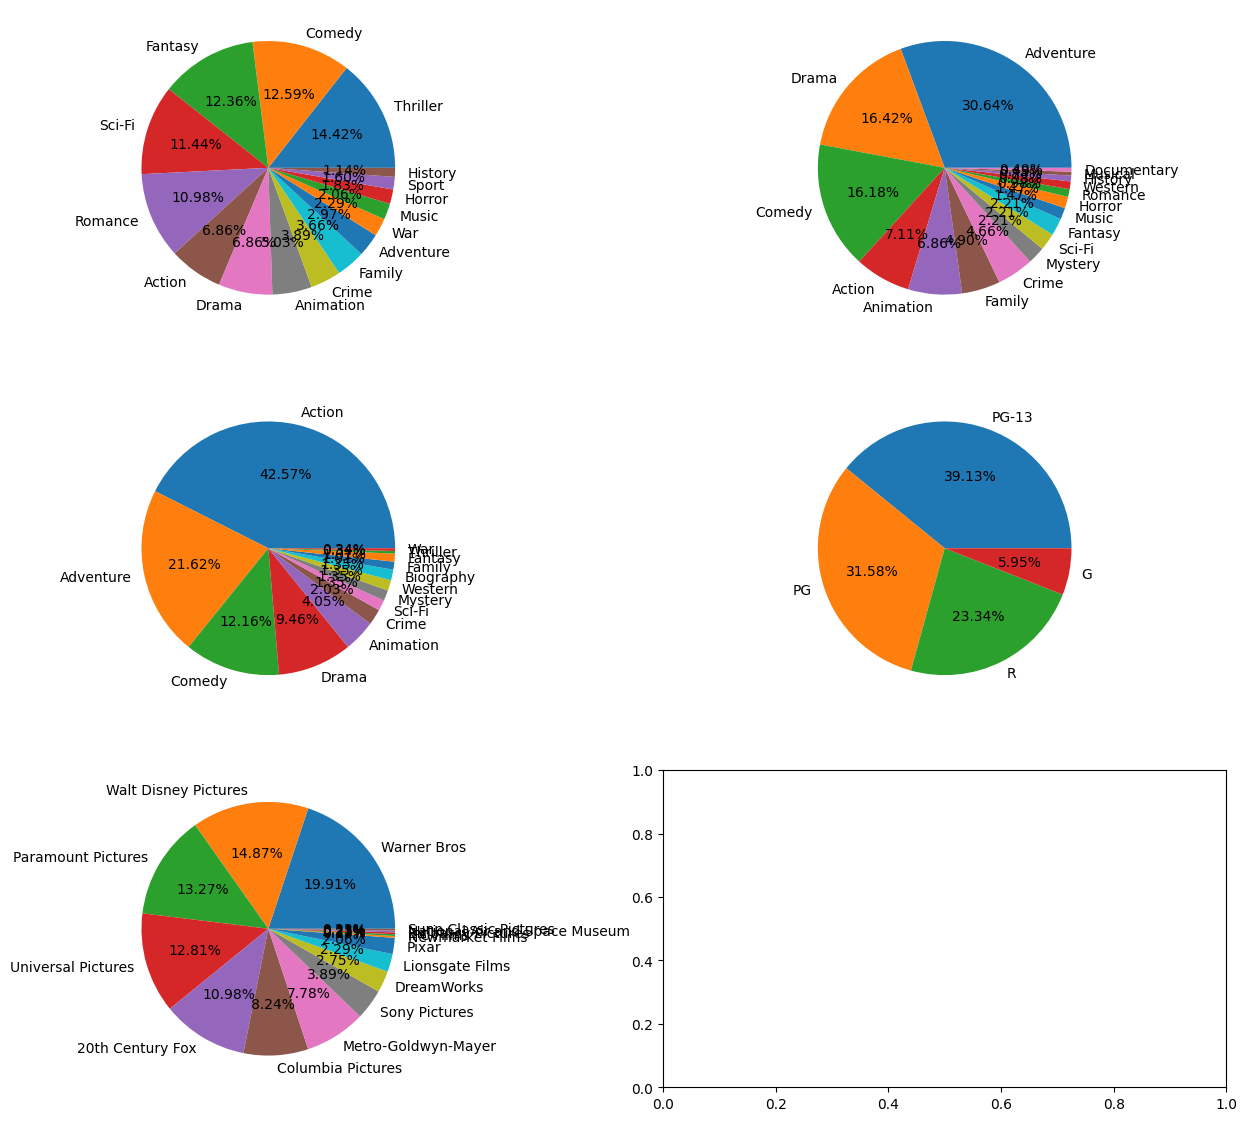

In [32]:
#Pie plot for proportion
genre_count = df['Main_Genre'].value_counts()

bar_cols = ['Main_Genre', 'Genre_2', 'Genre_3', 'rating', 'studio']
fig, ax = plt.subplots(nrows= 3, ncols= 2, figsize=(16,14))
for i in range(3):
    for j in range(2):
        if i*2 + j >=5 :
            break
        counts = df[bar_cols[i*2 + j]].value_counts()

        ax[i,j].pie(counts.values, labels = counts.index,autopct = '%2.2f%%')



## 5. Analisis post-visualizaciones 

En los graficos de caja-bigote se evidencia que en los valores de la clasificacion en el rating IMDB y en la duracion (length) de la pelicula hay casos atipicos (outlayers)

Aunque en dependencia del analisis que se desee ralizar sobre los datos en ocasiones se decide mantener los outlayers, en algunos casos se procede a eliminar estos valores.


Una forma de calcular casos atípicos empleando solo medidas de posición es según el criterio *IQR*. Este considera como valor atípico aquel dato que:

- es mayor que: $Q_3 + 1.5 (Q_3 - Q_1)$
- es menor que: $Q_1 + 1.5 (Q_3 - Q_1)$

Este es el método que emplean tradicionalmente las gráficas de cajas y bigotes. En realidad la constante $1.5$ puede se sustituida por otro valor, pero este es el más habitual.



In [14]:
# Quantiles Q1 y Q3
Q_3 = df['length'].quantile(0.75)
Q_1 = df['length'].quantile(0.25)

# Define a threshold
IQR = Q_3 - Q_1
upper = Q_3 + (1.5 * IQR)
lower = Q_1 - (1.5 * IQR)

# Identify outlayes
# NOTE: Those are outlayers only for length values
# they aren the Dataset Outlayers.
outliers_iqr = df[(df['length'] < lower) | (df['length'] > upper)]
outliers_iqr

,Main_Genre,Genre_2,Genre_3,imdb_rating,length,rank_in_year,rating,studio,title,worldwide_gross,year
134,Drama,Adventure,Action,7.3,187,5,PG-13,Universal Pictures,King Kong,550517357.0,2005
150,Fantasy,Adventure,Western,8.9,201,1,PG-13,Warner Bros,The Lord of the Rings: The Return of the King,119930521.0,2003
175,Romance,Drama,Action,6.0,183,6,PG-13,Walt Disney Pictures,Pearl Harbor,449220945.0,2001
210,Romance,Drama,NaN,7.7,194,1,PG-13,Paramount Pictures,Titanic,843202268.0,1997
253,History,Drama,Biography,8.9,195,4,R,Universal Pictures,Schindler's List,321306305.0,1993
275,Thriller,History,Drama,8.0,189,6,R,Warner Bros,JFK,205405498.0,1991
283,Drama,Western,Adventure,8.0,181,4,PG-13,Metro-Goldwyn-Mayer,Dances with Wolves,424208848.0,1990
409,War,Drama,NaN,8.2,182,10,R,Universal Pictures,The Deer Hunter,1459328.0,1978
421,History,Documentary,NaN,7.0,27,2,G,National Air and Space Museum,To Fly!,1460000.0,1976


Se procede entonces a eliminar los outlayers, y volver a graficar la caja-bigotes.

Aunque se eliminen los datos atípicos, pudieran surgir nuevos valores atípicos ya que estos se obtienen al calcular los cuartiles en el nuevo conjunto de datos, esto no quiere decir que el procedimiento se haya realizado de manera ncorrecta ni que sea necesario repetir el proceso hasta no obtener outlayers.


{'whiskers': [<matplotlib.lines.Line2D at 0x7f32f3702800>,
 'caps': [<matplotlib.lines.Line2D at 0x7f32f3702d40>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f32f3702560>],
 'medians': [<matplotlib.lines.Line2D at 0x7f32f3703280>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f32f37037c0>],
 'means': [<matplotlib.lines.Line2D at 0x7f32f3703520>]}

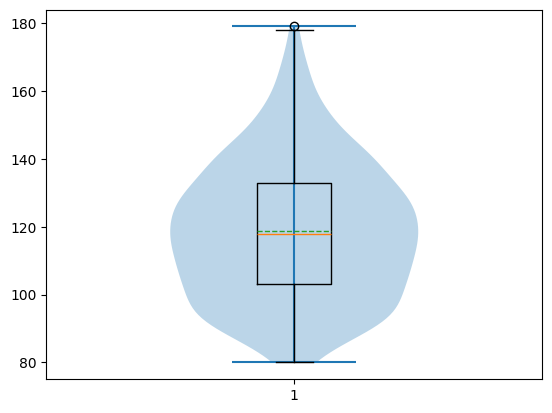

In [24]:
# Remove length outliers 
no_outliers_iqr = df[(df['length'] > lower) & (df['length'] < upper)]
no_outliers_iqr

# boxplot without outlayers
plt.violinplot(no_outliers_iqr['length'])
plt.boxplot(no_outliers_iqr['length'], showmeans = True, meanline = True)

Otra forma de eliminar casos atípicos es utilizando el puntaje Z (Z-score), que es una aplicación del Teorema de Chebyshov:

> Sea $X$ una variable aleatoria con media $\mu$ y varianza $\sigma^2$. Sea $a>1$, entonces se cumple que:
> $$P(|X - \mu| > a \sigma) \le \frac{1}{a^2}$$

Con esta regla se garantiza en teoría para cualquier distribución de $X$ una cota superior para la probabilidad de datos alejados de la media.
Por ejemplo para:
- $a=1.5: \quad 0.4444$
- $a=2: \quad 0.25$
- $a=3: \quad 0.1111$
- $a=4: \quad 0.0625$

Para el caso particular donde $X$ distribuye normal se tiene que:
- $P(|X - \mu| < \sigma) = 0.682$
- $P(|X - \mu| < 2 \sigma) = 0.946$
- $P(|X - \mu| < 3 \sigma) = 0.988$

Bajo esta teoría y algún que otro detalle, el Z-score realiza una estandarización de la muestra a una variable $X$ normal con parámetros $(0,1)$, lo que permite seleccionar un valor $a$ (por lo general $3$), para eliminar aquellos datos que sean mayores que $a$ modularmente.

In [25]:
from scipy.stats import zscore

# Normaliza y modulariza la muestra
z_scores = zscore(df['imdb_rating'])
abs_z_scores = np.abs(z_scores)

# Seleccionamos umbral
outliers_z = df[abs_z_scores > 3]
outliers_z

,Main_Genre,Genre_2,Genre_3,imdb_rating,length,rank_in_year,rating,studio,title,worldwide_gross,year
96,Fantasy,Drama,Adventure,4.6,130,7,PG-13,Lionsgate Films,The Twilight Saga: New Moon,709827462.0,2009
357,Romance,Music,Drama,4.4,93,8,PG,Paramount Pictures,Staying Alive,1532670.0,1983
425,Family,Documentary,NaN,4.6,99,6,G,Sunn Classic Pictures,In Search of Noah's Ark,1250000.0,1976


Igual que en procedimiento anterior al eliminar los outlayers, y volver a graficar la caja-bigotes, pudieran surgir nuevos valores atípicos.

{'whiskers': [<matplotlib.lines.Line2D at 0x7f32f357a950>,
 'caps': [<matplotlib.lines.Line2D at 0x7f32f357ae90>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f32f357a6b0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f32f357b3d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f32f357b910>],
 'means': [<matplotlib.lines.Line2D at 0x7f32f357b670>]}

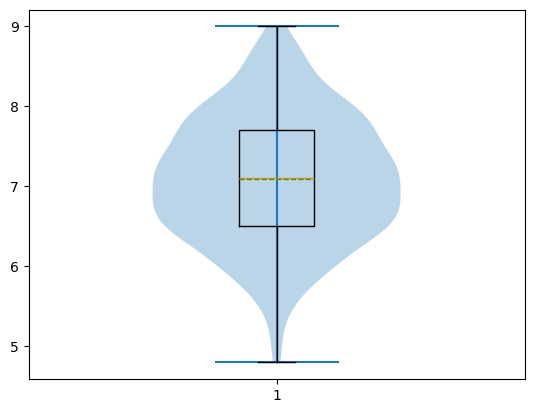

In [26]:
# Remove imdb_rating outliers 
no_outliers_z = df[abs_z_scores <= 3]
no_outliers_z

# boxplot without outlayers
plt.violinplot(no_outliers_z['imdb_rating'])
plt.boxplot(no_outliers_z['imdb_rating'], showmeans = True, meanline = True)

Otro analisis que se puede realizar a partir de los graficos de pastel, y los graficos de barra es que existen muchas categorias de generos cinematograficos y que existen muchos estudios cinematograficos que no tienen una aplia representacion en la muestra. 

Ademas de que son muchas las categorias en cada caso en que se divide la muestra, en ocasiones cuando esto sucede resulta practico agrupar todas las categorias que son poco predominantes en una categorias `Otros`. 

Asumiendo que una categoria es poco predominante cuando representa menos de un 10\% de los datos de la muestra, se puede proceder de la siguiente forma.

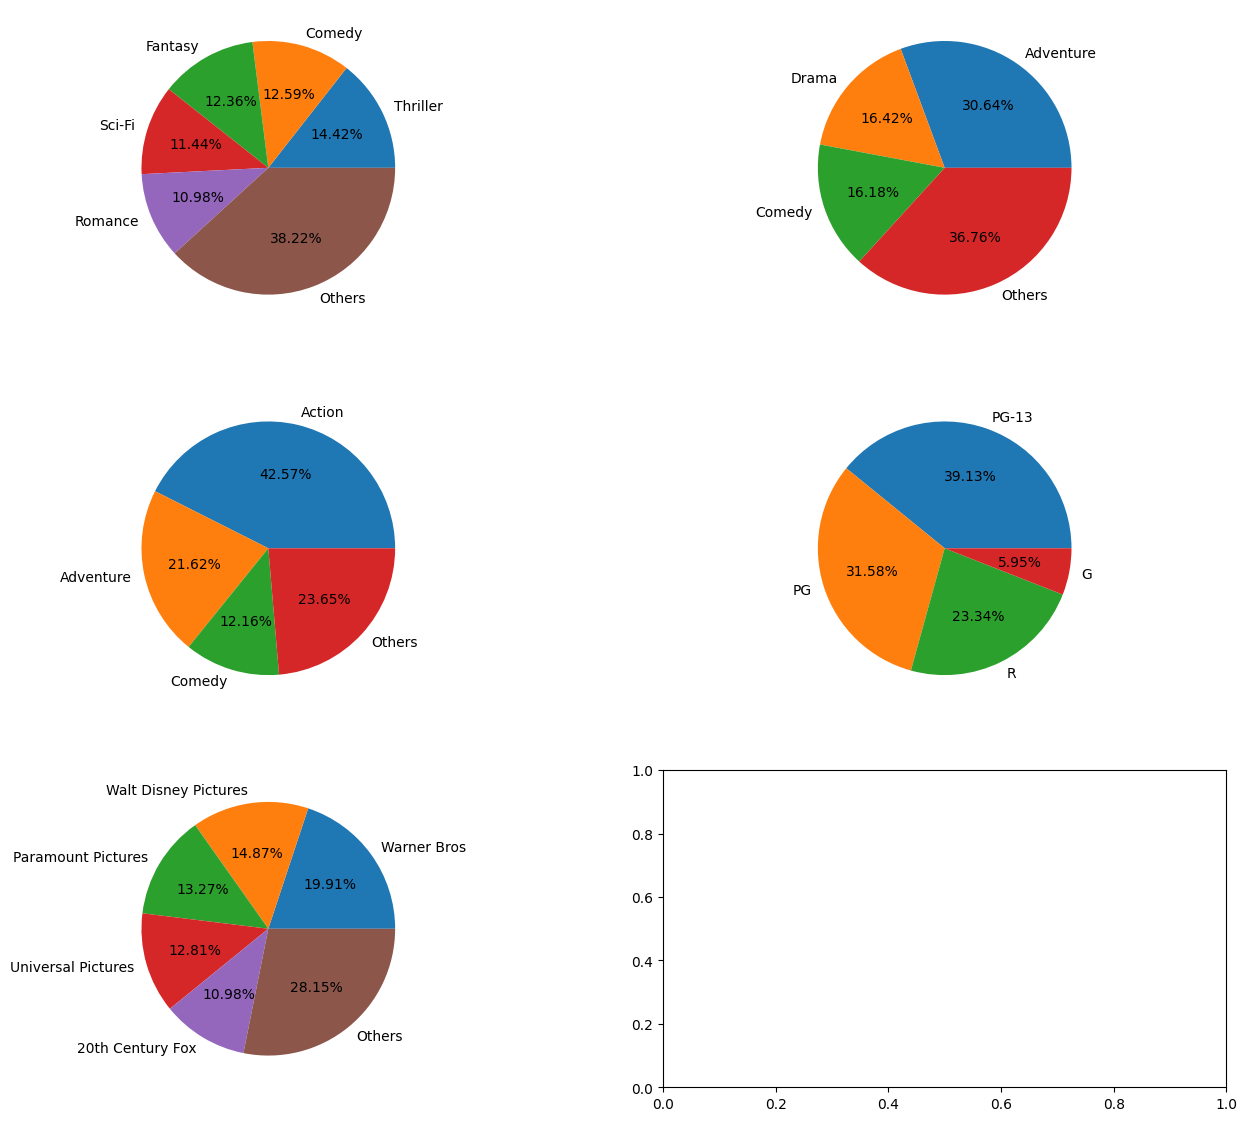

In [27]:
bar_cols = ['Main_Genre', 'Genre_2', 'Genre_3', 'rating', 'studio']
fig, ax = plt.subplots(nrows= 3, ncols= 2, figsize=(16,14))
for i in range(3):
    for j in range(2):
        if i*2 + j >=5 :
            break
        counts = df[bar_cols[i*2 + j]].value_counts()

        s = counts.sum()
        others = 0
        index_remove = []
        for index, value in zip(counts.index, counts.values):
            if value < s * 0.1:
                others += value
                index_remove.append(index)
        if others > 0 and len(index_remove) > 1:
            counts.drop(index=index_remove,inplace=True)
            counts.loc['Others'] = others

        ax[i,j].pie(counts.values, labels = counts.index,autopct = '%2.2f%%')

## 6. Analisis mas especifico de ciertos comportamientos

Se pudiera realizar un analisis de la distribucion del rating de IMDB, si se analiza la forma del histograma este parece indicar que esta variable tiene una distribucion Normal, pero para tener certeza es necesario realizar un test de normalidad

In [28]:
# Test de Durbin (Normalidad para conjuntos grandes)
alpha = 0.05
_, p = stats.normaltest(df['imdb_rating'])
print('P-value: ', p)
if p > 0.05:
    print('Los datos son Normales')
else:
    print('Los datos no son Normales')

P-value:  0.3866881385098241
Los datos son Normales


In [29]:
# Test de Shapiro (Normalidad para pocos datos)
p = stats.shapiro(df['imdb_rating']).pvalue
print('P-value: ', p)
if p > 0.05:
    print('Los datos son Normales')
else:
    print('Los datos no son Normales')

P-value:  0.029198922216892242
Los datos no son Normales


Se debe notar que los dos Test dan resultados opuestos. Qué sucedió? Pués no se aplicó correctamente Shapiro ya que utilizamos muchísimos datos. Para ello hagamos un muestreo aleatorio simple, con menos valores (solo 30):

In [30]:
# df.sample
p = stats.shapiro(df['imdb_rating'].sample(30)).pvalue
print('P-value: ', p)
if p > 0.05:
    print('Los datos son Normales')
else:
    print('Los datos no son Normales')

P-value:  0.7200627326965332
Los datos son Normales


Una curiosidad sobre las distribuciones Normales, es que aproximadamente el 99\% de los datos estan en el intervalo $(-3\sigma^2; 3\sigma^2)$, a modo de ilustracion, ya que se conoce tras el test de normalidad que la variabe ratind_imdb distribuye Normal, entonces modo de curiosidad se muestra una grafica con los valores del rating IMDB de cada pelicula, la estimacion puntual de su media y a cada lado hasta 3 varianzas

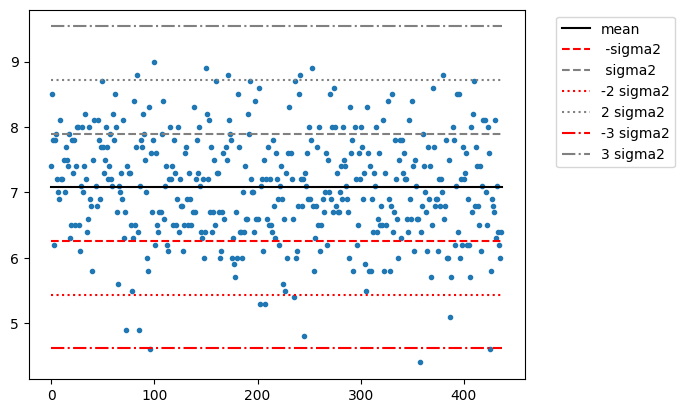

In [57]:
## Data Visualization

len_x = len(df)

plt.scatter(range(len_x), df['imdb_rating'], marker='.')
plt.plot([0, len_x], [means_imdb,means_imdb], color= 'black', label="mean")
plt.plot([0, len_x], [means_imdb-std_devs_imdb, means_imdb-std_devs_imdb],color= 'red', linestyle='--', label=" -sigma2")
plt.plot([0, len_x], [means_imdb+std_devs_imdb, means_imdb+std_devs_imdb], color= 'gray', linestyle='--', label=" sigma2")
plt.plot([0, len_x], [means_imdb-2*std_devs_imdb, means_imdb-2*std_devs_imdb], color= 'red', linestyle=':', label="-2 sigma2")
plt.plot([0, len_x], [means_imdb+2*std_devs_imdb, means_imdb+2*std_devs_imdb], color= 'gray', linestyle=':', label="2 sigma2")
plt.plot([0, len_x], [means_imdb-3*std_devs_imdb, means_imdb-3*std_devs_imdb], color= 'red', linestyle='-.', label="-3 sigma2")
plt.plot([0, len_x], [means_imdb+3*std_devs_imdb, means_imdb+3*std_devs_imdb], color= 'gray', linestyle='-.', label="3 sigma2")
plt.legend(bbox_to_anchor = (1.05,1), loc= 'upper left')

Otros analisis de interes pueden realizarse solo para una submuestra de los datos que tenga una caracteristicaa comun, por ejemplo en la clasificacion de las peliculas segun el publico apto para su visualizacion, se puede hacer un analisis del comportamiento de las variables cuantitativas para determinar por ejemplo si para alguna categoria se producen mas ganancis que las restantes, si a partir de cierto a\~no se produce un incremento o decremento en la filmacion de este tipo de peliculas, etc.

Por ejemplo, si hacemos el analisis para la categoria `R` de peliculas se tiene:

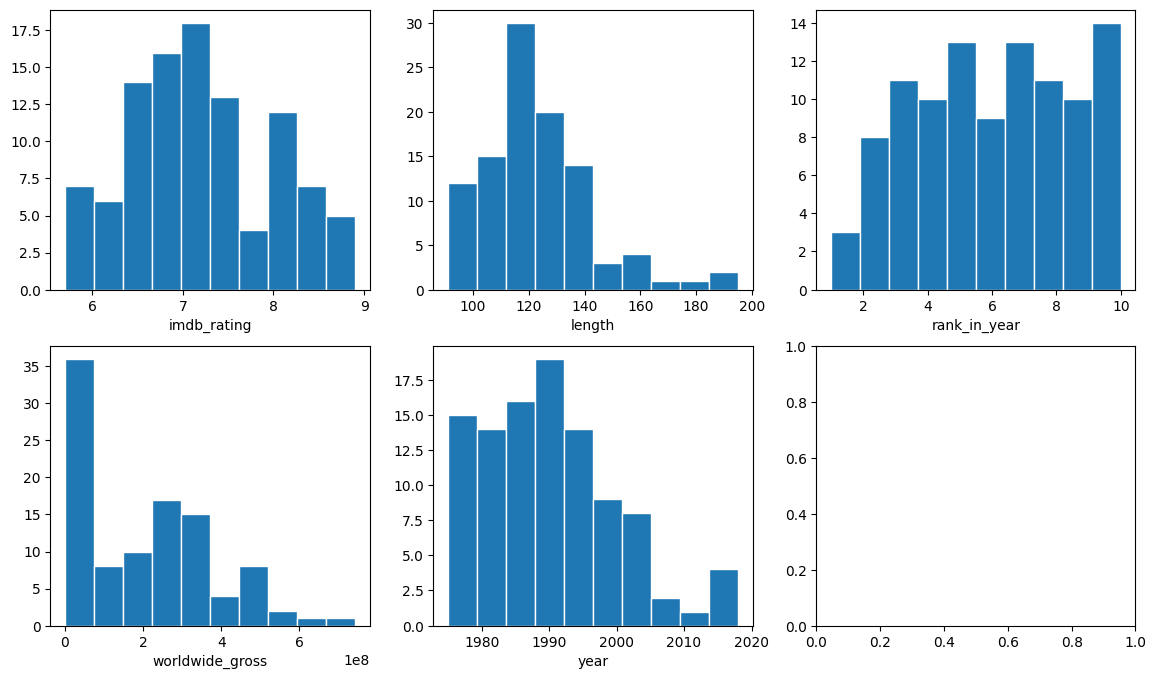

In [31]:
# Analizamos rápidamente como distribuyen las variables de las películas catalogadas de R
R = df[df['rating']=='R']
hist_col = ['imdb_rating', 'length', 'rank_in_year', 'worldwide_gross', 'year']
fig, ax = plt.subplots(nrows= 2, ncols= 3, figsize=(14,8))
for i in range(2):
    for j in range(3):
        if i*3 + j >=5 :
            break
        ax[i,j].hist(R[hist_col[i*3 + j]], edgecolor = "white")
        ax[i,j].set_xlabel(hist_col[i*3 + j])

Ademas se puedieran agrupar por alguna clasificacion categorica las peliculas para analizar si este factor influye o no en que hayan diferencites comportamientos para otras variables. 

Por ejemplo si se agrupan las peliculas atendiendo a su Genero principal y se realiza un analisis con las garficas de caja y bigote del rating de aceptacion del IMDB  las peliculas de cda genero se tienen los siguientes resultados

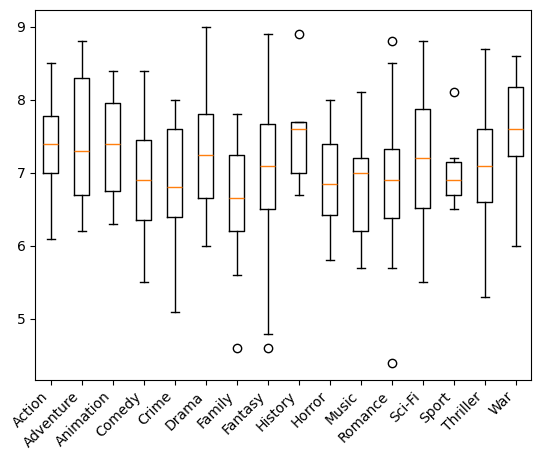

In [33]:
# Plot grouped box plots
grouped = df.groupby('Main_Genre')
imdb_ratings = [group['imdb_rating'] for _, group in grouped]

fig = plt.figure()
ax = fig.add_subplot(111)
plt.boxplot(imdb_ratings)
ax.set_xticklabels([name for name, _ in grouped], rotation=45, ha="right")
plt.show()

de la grafica anterior se pueden derivar analisis sobre por que la totalidad de peliculas deportivas no esta clasificada en 6-7 estrellas, o comparaciones entre cual de los generos tiene una mayor aceptacion. 

Se pueden hacer ademas graficos que relacionen variables, hasta este momento todo el analisis se ha hecho en cuanto a variables individuales.

Primeramente se puede hacer una relacion de cada par de variabes cuantitativas para analizar la posibilidad de alguna dependencia entre variables.

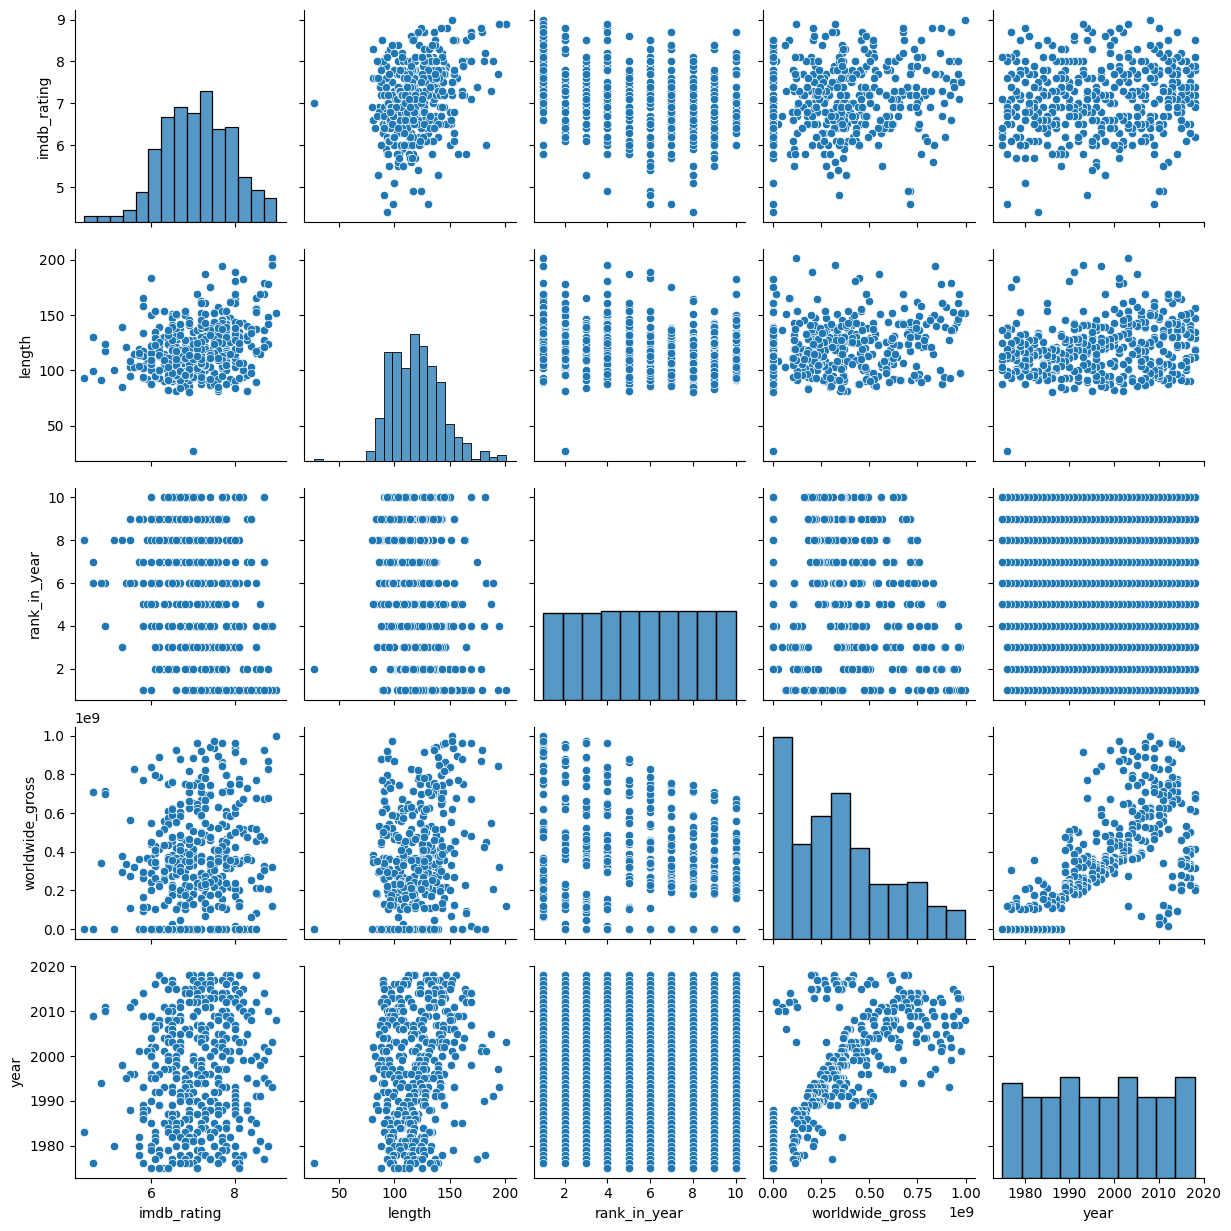

In [43]:
# Scatter plots to visualize relationships between features
sns.pairplot(df)

Incluso se pueden hacer graficos relacionando mas de dos categorias, para esto se puede agregar colores a los puntos de las graficas que representen una tercera informacion.

Por ejemplo, se pudiera representar las ganancias anuales de cada estudio cinematografico.

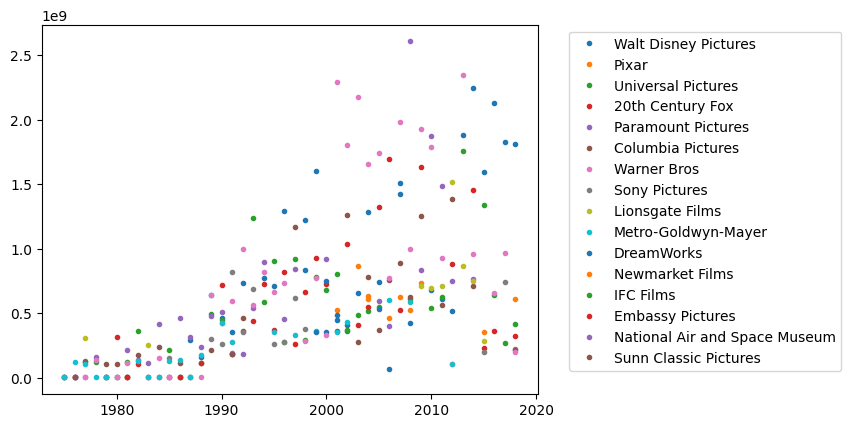

In [48]:
extract = df.groupby(['year', 'studio'])['worldwide_gross'].sum().reset_index()
for studio in df['studio'].unique():
    r = extract[(extract['studio']==studio)]
    plt.plot(r['year'].values, r['worldwide_gross'].values, '.', label = studio)

plt.legend(bbox_to_anchor = (1.05,1), loc= 'upper left')

Incluso pudieran analizrse como se comportan las ganancias anuales de los estudios `Warner Bros` y `Walt Disney Pictures`, que son los dos estudios que mas peliculas tienen en la muestra

In [60]:
year_studio_group = df.groupby(['year','studio'])['worldwide_gross',].sum().reset_index()
year_studio_group

year_studio =[]
for year in range(1975, 2019):
    for studio in df['studio'].unique():
        year_studio.append((year, studio))
year_studio = pd.DataFrame(data= year_studio, columns=['year','studio'])
#newdf.join(year_studio_group, on=['year','studio'])
year_studio = pd.merge(year_studio_group, year_studio, how="right", on=['year','studio']).fillna(0)
year_studio

,year,studio,worldwide_gross
0,1975,Walt Disney Pictures,1213000.0
1,1975,Pixar,0.0
2,1975,Universal Pictures,1013100.0
3,1975,20th Century Fox,0.0
4,1975,Paramount Pictures,0.0
...,...,...,...
699,2018,Newmarket Films,0.0
700,2018,IFC Films,0.0
701,2018,Embassy Pictures,0.0
702,2018,National Air and Space Museum,0.0


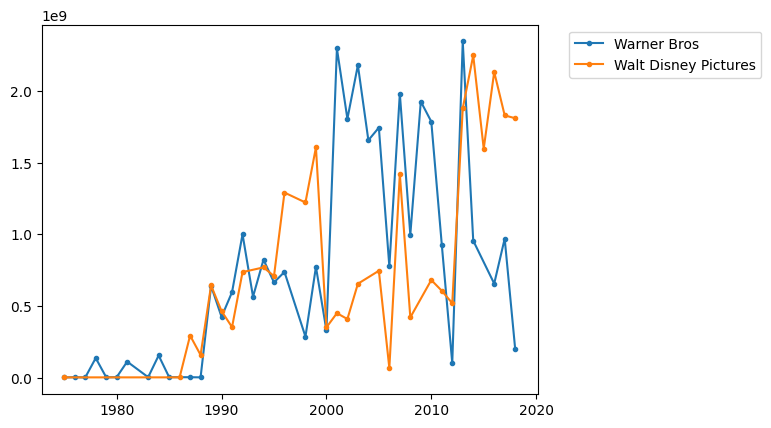

In [62]:
# Serie de Tiempo de la cantidad de recaudación por año de los estudios: 'Warner Bros', 'Walt Disney Pictures'
['Warner Bros', 'Walt Disney Pictures']
for studio in ['Warner Bros', 'Walt Disney Pictures']:
    extract = year_studio_group[(year_studio_group['studio']==studio)]
    plt.plot(extract['year'].values, extract['worldwide_gross'].values, '.-', label=studio)
plt.legend(bbox_to_anchor = (1.05,1), loc= 'upper left')

Se pudiera tambien analizar la cantidad de peliculas anuales que se producen de cada genero

<Axes: xlabel='year', ylabel='Main_Genre'>

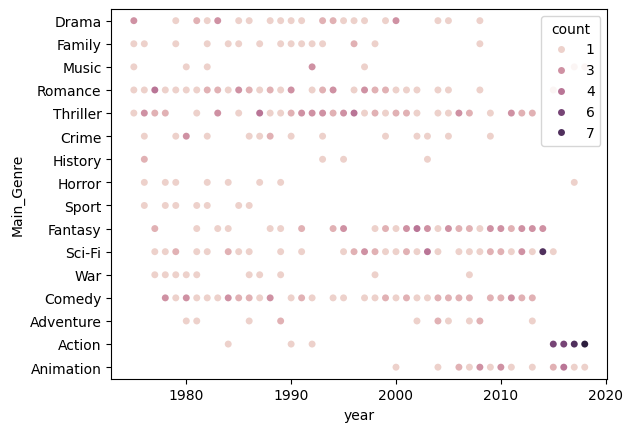

In [58]:
# Analizamos la cantidad de películas por género y año.
genres_year = df.groupby(['year','Main_Genre'])['Main_Genre',].count()
genres_year = genres_year.rename(columns={'Main_Genre': 'count'}).reset_index()

#plt.plot(genres_year['year'], )
genres_year[genres_year['Main_Genre'] == 'Drama']#['counts']

sns.swarmplot(data=genres_year, x="year", y="Main_Genre", hue="count")